# DELIVERY COMPANY - CLASSIFICATION HOMEWORK

In this section, I am trying to develop a model that can predict the probability of a device failure. This dataset is taken from Kaggle.com.

About Dataset

A company has a fleet of devices transmitting daily sensor readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted.

The task is to build a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize

<img src='https://t4.ftcdn.net/jpg/06/09/86/69/360_F_609866913_ZfgSRBJKwDkj1c1GiY8D2wLmcRHQVjD8.jpg' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset/data' target= _blank> Can get data from this link

In [70]:
### Import Packages
import pandas as pd
from imblearn.over_sampling import SMOTE #x, y = oversample.fit_resample(x, y)
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
### Read Data
df = pd.read_csv('failure.csv')

### EDA - Exploratory Data Analysis

In [72]:
df.head()

date    device  failure  attribute1  attribute2  attribute3  \
0  2015-01-01  S1F01085        0   215630672          56           0   
1  2015-01-01  S1F0166B        0    61370680           0           3   
2  2015-01-01  S1F01E6Y        0   173295968           0           0   
3  2015-01-01  S1F01JE0        0    79694024           0           0   
4  2015-01-01  S1F01R2B        0   135970480           0           0   

   attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
0          52           6      407438           0           0           7  
1           0           6      403174           0           0           0  
2           0          12      237394           0           0           0  
3           0           6      410186           0           0           0  
4           0          15      313173           0           0           3

In [73]:
df.tail()

date    device  failure  attribute1  attribute2  attribute3  \
124489  2015-11-02  Z1F0MA1S        0    18310224           0           0   
124490  2015-11-02  Z1F0Q8RT        0   172556680          96         107   
124491  2015-11-02  Z1F0QK05        0    19029120        4832           0   
124492  2015-11-02  Z1F0QL3N        0   226953408           0           0   
124493  2015-11-02  Z1F0QLC1        0    17572840           0           0   

        attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
124489           0          10      353705           8           8           0  
124490           4          11      332792           0           0          13  
124491           0          11      350410           0           0           0  
124492           0          12      358980           0           0           0  
124493           0          10      351431           0           0           0

In [74]:
df.shape

(124494, 12)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [76]:
df.describe().T

count          mean           std  min         25%  \
failure     124494.0  8.514467e-04  2.916725e-02  0.0         0.0   
attribute1  124494.0  1.223868e+08  7.045960e+07  0.0  61276754.0   
attribute2  124494.0  1.594848e+02  2.179658e+03  0.0         0.0   
attribute3  124494.0  9.940455e+00  1.857473e+02  0.0         0.0   
attribute4  124494.0  1.741120e+00  2.290851e+01  0.0         0.0   
attribute5  124494.0  1.422269e+01  1.594302e+01  1.0         8.0   
attribute6  124494.0  2.601729e+05  9.915101e+04  8.0    221452.0   
attribute7  124494.0  2.925282e-01  7.436924e+00  0.0         0.0   
attribute8  124494.0  2.925282e-01  7.436924e+00  0.0         0.0   
attribute9  124494.0  1.245152e+01  1.914256e+02  0.0         0.0   

                    50%          75%          max  
failure             0.0          0.0          1.0  
attribute1  122795744.0  183308370.0  244140480.0  
attribute2          0.0          0.0      64968.0  
attribute3          0.0          0.0      24929.0  
attribute4          0.0          0.0       1666.0  
attribute5         10.0         12.0         98.0  
attribute6     249799.5     310266.0     689161.0  
attribute7          0.0          0.0        832.0  
attribute8          0.0          0.0        832.0  
attribute9          0.0          0.0      18701.0

In [77]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [78]:
df['device'].value_counts()

device
S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
           ... 
Z1F0LT6P      5
Z1F0LT6Z      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
Name: count, Length: 1168, dtype: int64

In [79]:
# find distinct device's fisrt 3 characters for model
df['device_model'] = df['device'].apply(lambda x: x[:3])

In [80]:
# find distinct device's fisrt 4 characters for series
df['device_serie'] = df['device'].apply(lambda x: x[:4])

In [81]:
df.head()

date    device  failure  attribute1  attribute2  attribute3  \
0  2015-01-01  S1F01085        0   215630672          56           0   
1  2015-01-01  S1F0166B        0    61370680           0           3   
2  2015-01-01  S1F01E6Y        0   173295968           0           0   
3  2015-01-01  S1F01JE0        0    79694024           0           0   
4  2015-01-01  S1F01R2B        0   135970480           0           0   

   attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  \
0          52           6      407438           0           0           7   
1           0           6      403174           0           0           0   
2           0          12      237394           0           0           0   
3           0           6      410186           0           0           0   
4           0          15      313173           0           0           3   

  device_model device_serie  
0          S1F         S1F0  
1          S1F         S1F0  
2          S1F         S1F0  
3          S1F         S1F0  
4          S1F         S1F0

In [82]:
df['device_model'].unique()

array(['S1F', 'W1F', 'Z1F'], dtype=object)

In [83]:
df['device_serie'].unique()

array(['S1F0', 'S1F1', 'W1F0', 'W1F1', 'Z1F0', 'Z1F1', 'Z1F2'],
      dtype=object)

In [84]:
df['device_model'].value_counts()

device_model
S1F    54858
W1F    43268
Z1F    26368
Name: count, dtype: int64

In [85]:
df['device_serie'].value_counts()

device_serie
S1F0    33169
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

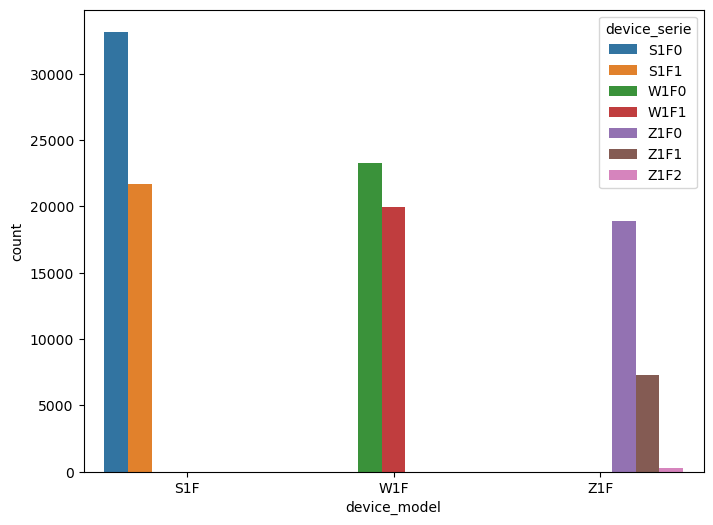

In [86]:
plt.figure(figsize=(8, 6))
sns.countplot(x= 'device_model', hue = 'device_serie', data=df);

In [87]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

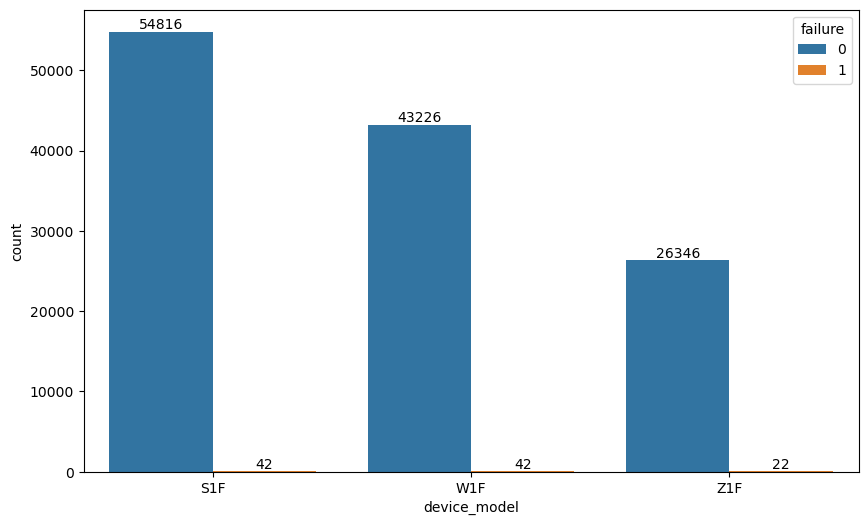

In [88]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x= 'device_model', hue = 'failure', data=df);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

In [89]:
import plotly.express as px

In [90]:
px.bar(df, x = 'device_model', y = 'failure', color = 'device_serie')

In [91]:
df['attribute1'].value_counts()

attribute1
57192360     26
165048912    26
89196552     26
169490248    23
169467344    15
             ..
181770800     1
201893264     1
238768304     1
53326688      1
17572840      1
Name: count, Length: 123878, dtype: int64

In [92]:
df['attribute6'].value_counts()

attribute6
31        777
44        708
27        636
26        520
29        441
         ... 
333227      1
210463      1
218313      1
251108      1
351431      1
Name: count, Length: 44838, dtype: int64

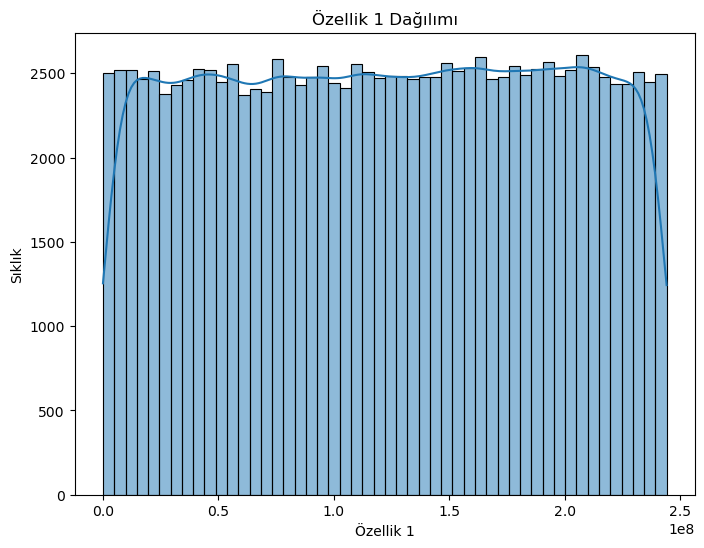

In [93]:
# Veri setinin genel dağılımını gösteren histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="attribute1", kde=True)
plt.title("Özellik 1 Dağılımı")
plt.xlabel("Özellik 1")
plt.ylabel("Sıklık")
plt.show()


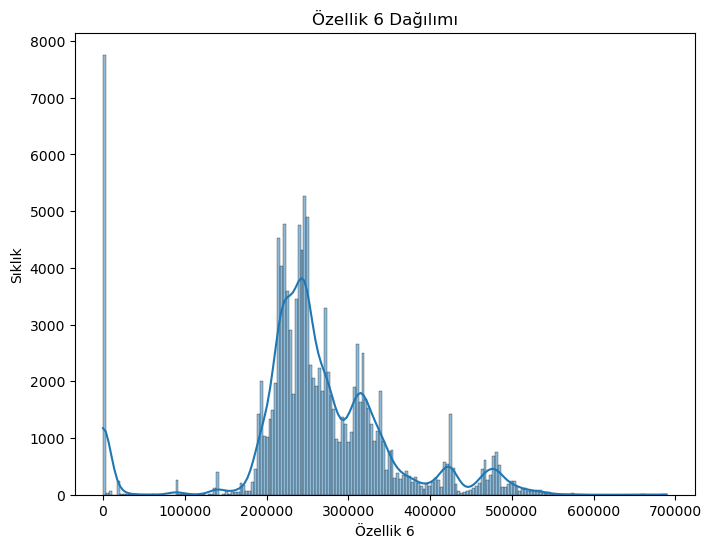

In [94]:
# Veri setinin genel dağılımını gösteren histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="attribute6", kde=True)
plt.title("Özellik 6 Dağılımı")
plt.xlabel("Özellik 6")
plt.ylabel("Sıklık")
plt.show()


### Feature Engineering

In [95]:
df['year'] = df['date'].str[:4].astype(int)
df['month'] = df['date'].str[5:7].astype(int)
df['day'] = df['date'].str[8:10].astype(int)

In [96]:
df.sample(20)

date    device  failure  attribute1  attribute2  attribute3  \
71745   2015-04-18  S1F0KYCR        0   144379952           0           0   
110088  2015-08-05  S1F0S561        0   219102480           0           0   
6846    2015-01-06  Z1F1AFF2        0   156361024         112           0   
94382   2015-06-20  S1F0H6JG        0   109305768           0           0   
6019    2015-01-06  S1F0RSG7        0   118193400           0         406   
3196    2015-01-03  W1F1BW8W        0    70139448           0           0   
112404  2015-08-12  S1F0VE35        0   117089520           0           0   
40972   2015-02-23  W1F1BG4H        0    27006616          24           0   
28328   2015-02-05  W1F0X6SQ        0   139383544           0           0   
32127   2015-02-10  Z1F18YST        0   223139008           0           0   
38681   2015-02-20  S1F10RKC        0    86628656           0           0   
10761   2015-01-12  S1F0PJAJ        0   190100144           0           0   
10779   2015-01-12  S1F0QYLA        0   168576304           0           1   
96594   2015-06-26  S1F13KF6        0   139410696           0           0   
51075   2015-03-10  W1F1BS0H        0   151726528           0           0   
61292   2015-03-25  Z1F19KMH        0   224711040           0           0   
43004   2015-02-26  W1F1CB5E        0   133958432          40           0   
38261   2015-02-19  W1F17DKS        0   159208184           0           0   
57406   2015-03-20  S1F0L0DW        0    96651552           0           0   
34315   2015-02-14  S1F0FZ8F        0    16119880           0           0   

        attribute4  attribute5  attribute6  attribute7  attribute8  \
71745            0          10      255611           0           0   
110088           0          14      295132           0           0   
6846             0          12          36           0           0   
94382            0           8      257526           0           0   
6019             0          12      310411           0           0   
3196             0          12      231515           0           0   
112404           0           8      298941           0           0   
40972            0          11          36           0           0   
28328            0          11      244780           0           0   
32127            0           8      227868           0           0   
38681            0          12      249778           0           0   
10761            0          12      261351           0           0   
10779            0           5      255461           0           0   
96594            0           9      240137           0           0   
51075            0          14      284401           0           0   
61292            0          14          45           0           0   
43004            0           9          29           0           0   
38261            0          11      217224           0           0   
57406            0           7      309453           0           0   
34315            0           8      223612           0           0   

        attribute9 device_model device_serie  year  month  day  
71745            0          S1F         S1F0  2015      4   18  
110088           0          S1F         S1F0  2015      8    5  
6846             0          Z1F         Z1F1  2015      1    6  
94382            0          S1F         S1F0  2015      6   20  
6019          2637          S1F         S1F0  2015      1    6  
3196             0          W1F         W1F1  2015      1    3  
112404           0          S1F         S1F0  2015      8   12  
40972            0          W1F         W1F1  2015      2   23  
28328            0          W1F         W1F0  2015      2    5  
32127            0          Z1F         Z1F1  2015      2   10  
38681            0          S1F         S1F1  2015      2   20  
10761            0          S1F         S1F0  2015      1   12  
10779            0          S1F         S1F0  2015      1   12  
96594          

In [97]:
df['year'].value_counts()

year
2015    124494
Name: count, dtype: int64

In [98]:
df['day_type'] = 'WD'
df.loc[pd.to_datetime(df['date']).dt.day_name().isin(['Saturday', 'Sunday']), 'day_type'] = 'WE'

In [99]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.weekday + 1

In [100]:
# drop date and year columns 
df=df.drop('date',axis=1)

In [101]:
df=df.drop('year',axis=1)

In [102]:
df.head()

device  failure  attribute1  attribute2  attribute3  attribute4  \
0  S1F01085        0   215630672          56           0          52   
1  S1F0166B        0    61370680           0           3           0   
2  S1F01E6Y        0   173295968           0           0           0   
3  S1F01JE0        0    79694024           0           0           0   
4  S1F01R2B        0   135970480           0           0           0   

   attribute5  attribute6  attribute7  attribute8  attribute9 device_model  \
0           6      407438           0           0           7          S1F   
1           6      403174           0           0           0          S1F   
2          12      237394           0           0           0          S1F   
3           6      410186           0           0           0          S1F   
4          15      313173           0           0           3          S1F   

  device_serie  month  day day_type  day_of_week  
0         S1F0      1    1       WD            4  
1         S1F0      1    1       WD            4  
2         S1F0      1    1       WD            4  
3         S1F0      1    1       WD            4  
4         S1F0      1    1       WD            4

In [103]:
#dev_model and dev_serie new features are created in the EDA section

In [104]:
df=df.drop('device',axis=1)

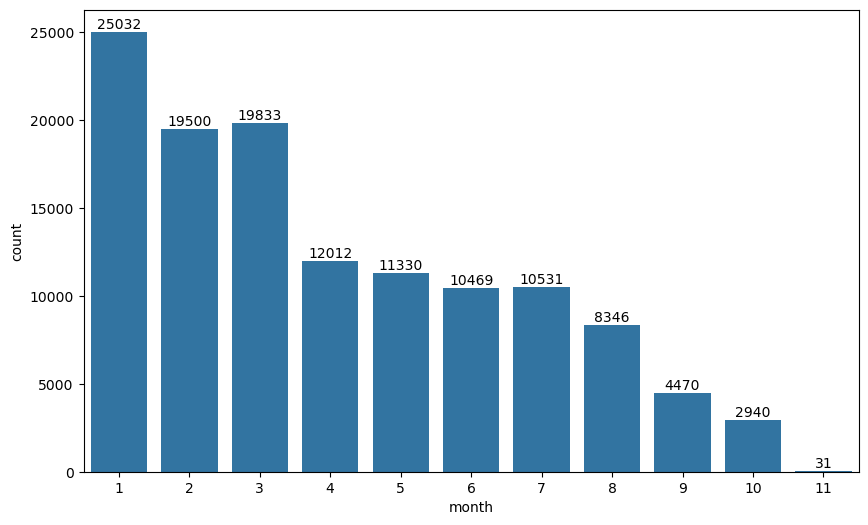

In [105]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x= 'month', data=df);
ax.bar_label(ax.containers[0])
plt.show()

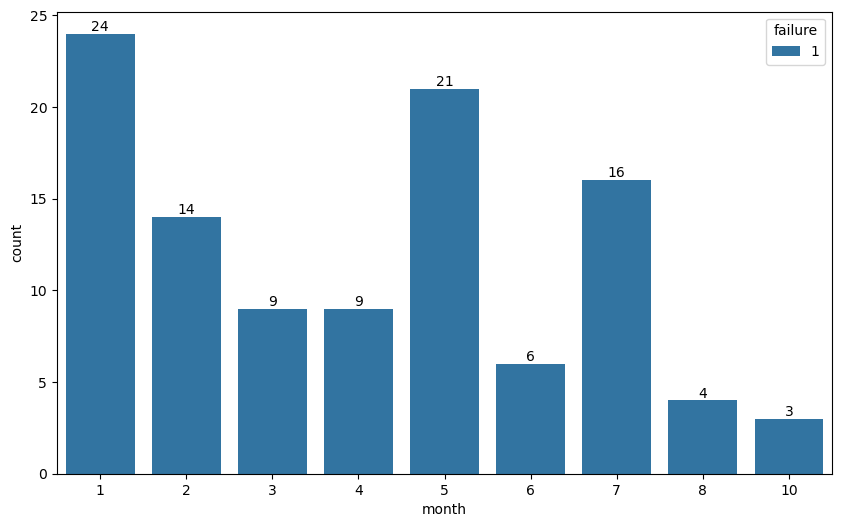

In [106]:
# create countplot for x=month, hue=failure and failure =1
dff=df[df['failure']==1]
plt.figure(figsize=(10, 6))
ax=sns.countplot(x= 'month', hue = 'failure', data=dff);
ax.bar_label(ax.containers[0])
plt.show()

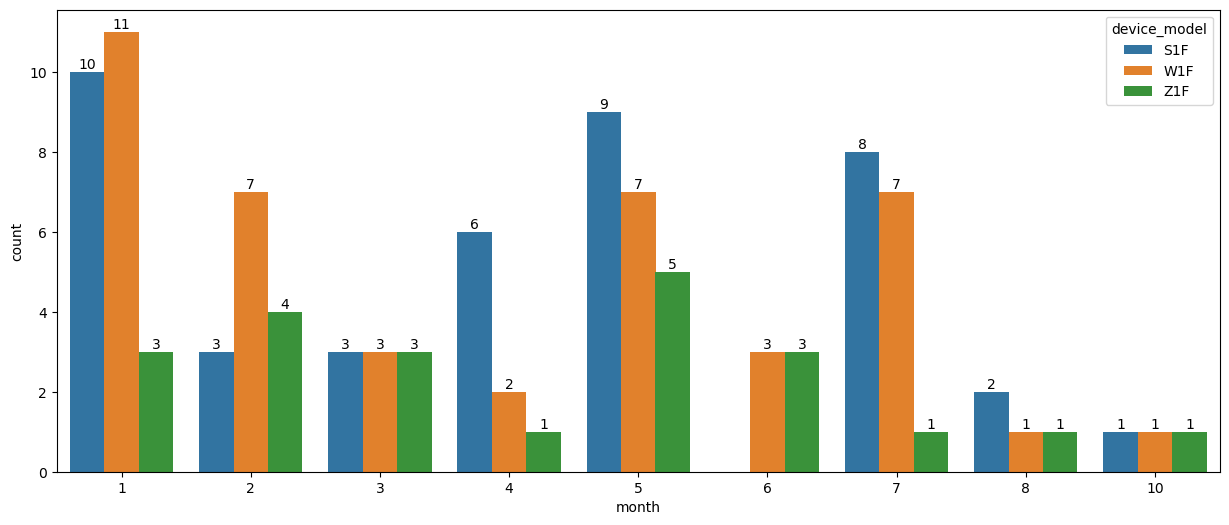

In [107]:
# create a figure with month, failure and device_model
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'month', hue = 'device_model', data=dff);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()


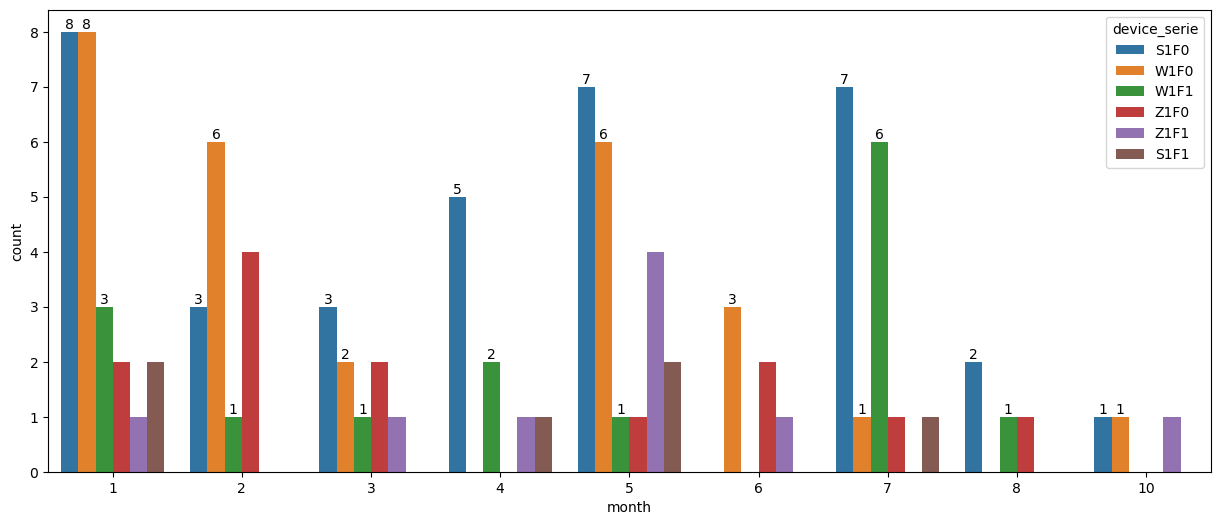

In [108]:
# create a figure with month, failure and device_model
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'month', hue = 'device_serie', data=dff);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()


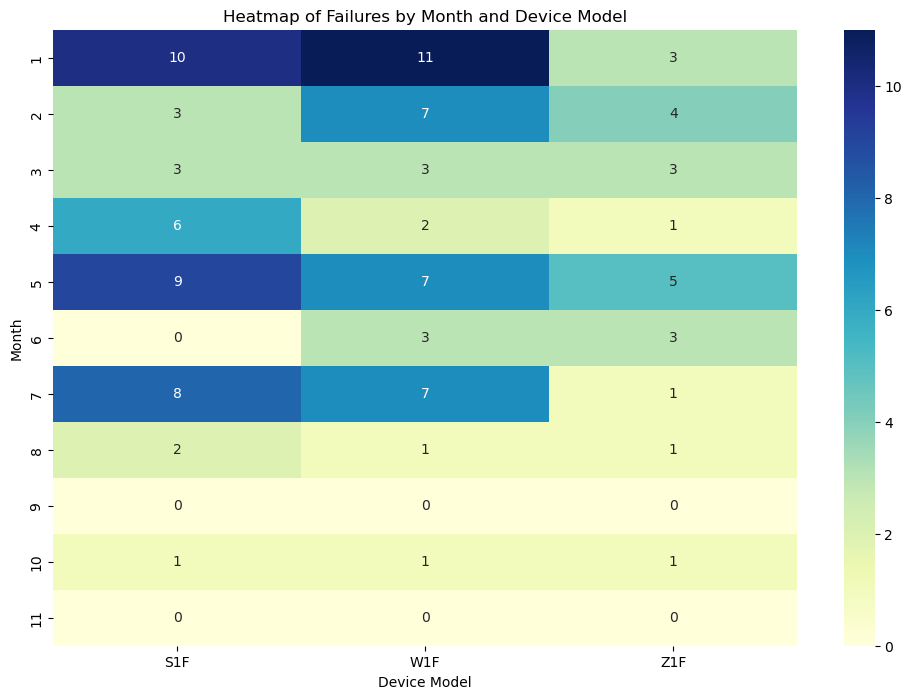

In [109]:
pivot_table = df.pivot_table(index='month', columns='device_model', values='failure', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Failures by Month and Device Model')
plt.xlabel('Device Model')
plt.ylabel('Month')
plt.show()

In [110]:
# create a new column as period_annual that is "first" for months in (1,2,3), "second" for months in (4,5,6,7,8), "third" for months in (9,10) and  "fourth" for months in (11,12) to see the volume of months

def get_period_annual(month):
    if month in [1, 2, 3]:
        return 'first'
    elif month in [4, 5, 6, 7, 8]:
        return 'second'
    elif month in [9, 10]:
        return 'third'
    elif month in [11, 12]:
        return 'fourth'

df['period_annual'] = df['month'].apply(get_period_annual)

In [111]:
df.sample(20)

failure  attribute1  attribute2  attribute3  attribute4  attribute5  \
28727         0   129793120           0           0           6           8   
83776         0   158261696           0           0           0          11   
68033         0    67299536           0           0           0          37   
59361         0    74040376           0           0           0          14   
27537         0    37453880           0           0           6          11   
59339         0   208910784           0           0           0           8   
30819         0    51552112           0           0           0           5   
116659        0    81081328           0           0           0          11   
66480         0   230544712           0           0           0          16   
69276         0    11387112           0           0           0          11   
431           0    90950360           0           0           0          11   
1564          0   114432656           0           0           0           8   
74942         0    30210632           0           1           0          15   
69459         0    89357416           0           0           0           9   
18962         0   187255376          16           0           0           8   
124469        0   100353624           0           0           0          11   
62001         0    31049240           0           0           0          13   
20696         0    39433160           0           0           4           9   
848           0   156726952           0           0           0           8   
57751         0   203893840           0           0           6           6   

        attribute6  attribute7  attribute8  attribute9 device_model  \
28727       271318           0           0           0          S1F   
83776       341171           0           0           0          Z1F   
68033       323060           0           0           0          W1F   
59361           44           0           0           0          Z1F   
27537       273632           0           0           2          W1F   
59339       203326           0           0           0          Z1F   
30819       274803           0           0           5          S1F   
116659      497081           0           0           0          Z1F   
66480       327495           0           0           0          S1F   
69276       481758           0           0           0          Z1F   
431         202251           0           0           0          S1F   
1564        274396           0           0           0          S1F   
74942       330481           0           0           0          S1F   
69459       429906           0           0           0          S1F   
18962       222181           0           0           0          W1F   
124469      352831           0           0          10          S1F   
62001       224617           0           0           0          S1F   
20696       205756           0           0           0          Z1F   
848         228901           0           0           0          W1F   
57751       243847           0           0           0          W1F   

       device_serie  month  day day_type  day_of_week period_annual  
28727          S1F0      2    6       WD            5         first  
83776          Z1F0      5   20       WD            3        second  
68033          W1F1      4    8       WD            3        second  
59361          Z1F1      3   22       WE            7         first  
27537          W1F0      2    4       WD            3         first  
59339          Z1F1      3   22       WE            7         first  
30819          S1F0      2    9       WD            1         first  
116659         Z1F0      8   29       WE            6        second  
66480          S1F1      4    5       WE            7        second  
69276          Z1F0      4   11       WE            6        second  
431            S1F1      1    1       WD            4         first  
1564           S

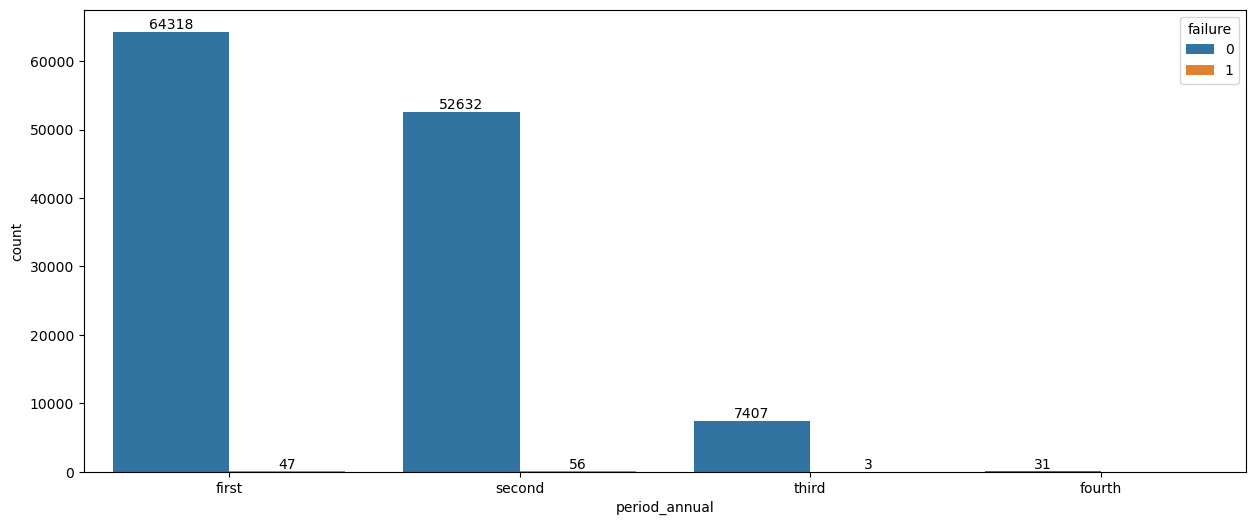

In [115]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'period_annual', hue = 'failure', data=df);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

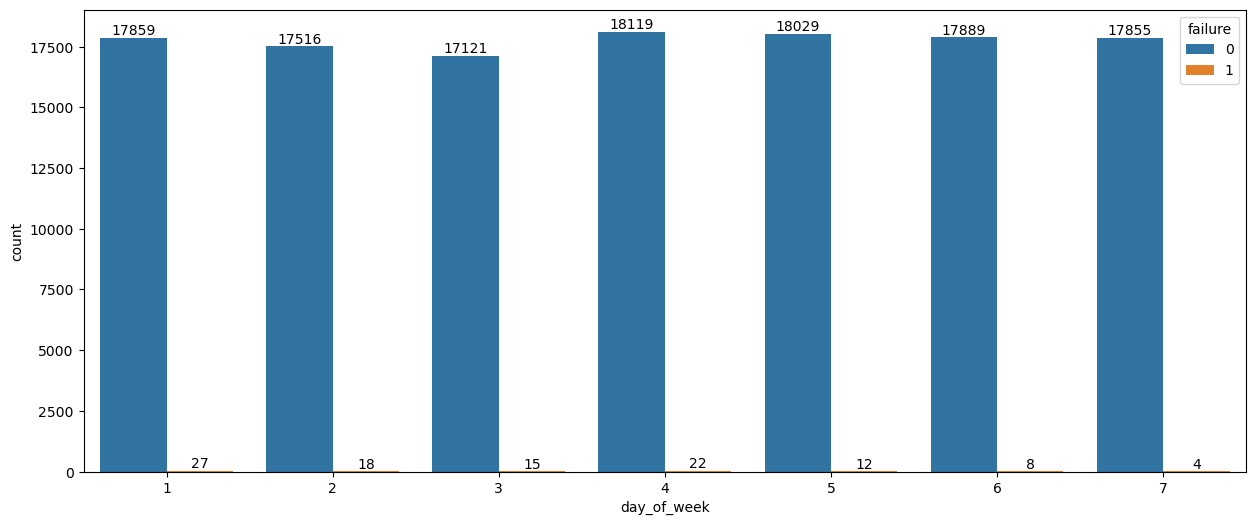

In [116]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'day_of_week', hue = 'failure', data=df);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

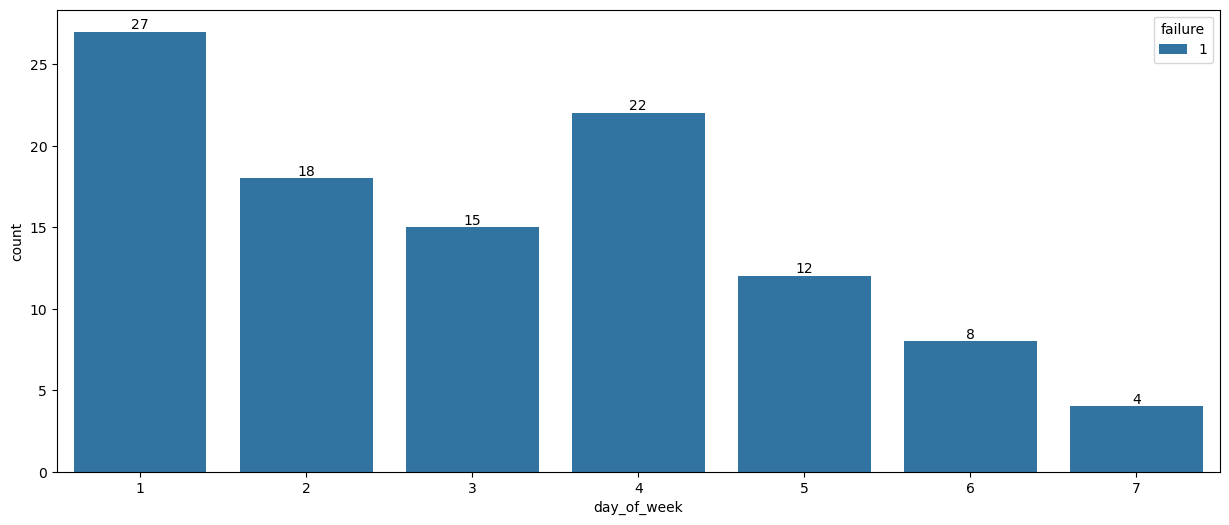

In [117]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'day_of_week', hue = 'failure', data=dff);
ax.bar_label(ax.containers[0])

plt.show()

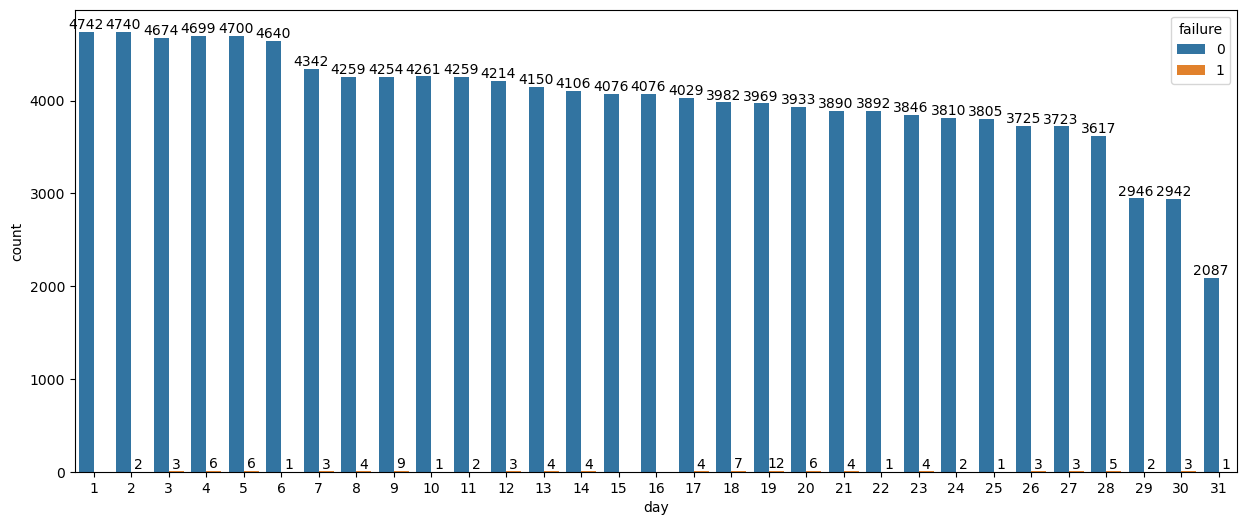

In [128]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'day', hue = 'failure', data=df);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

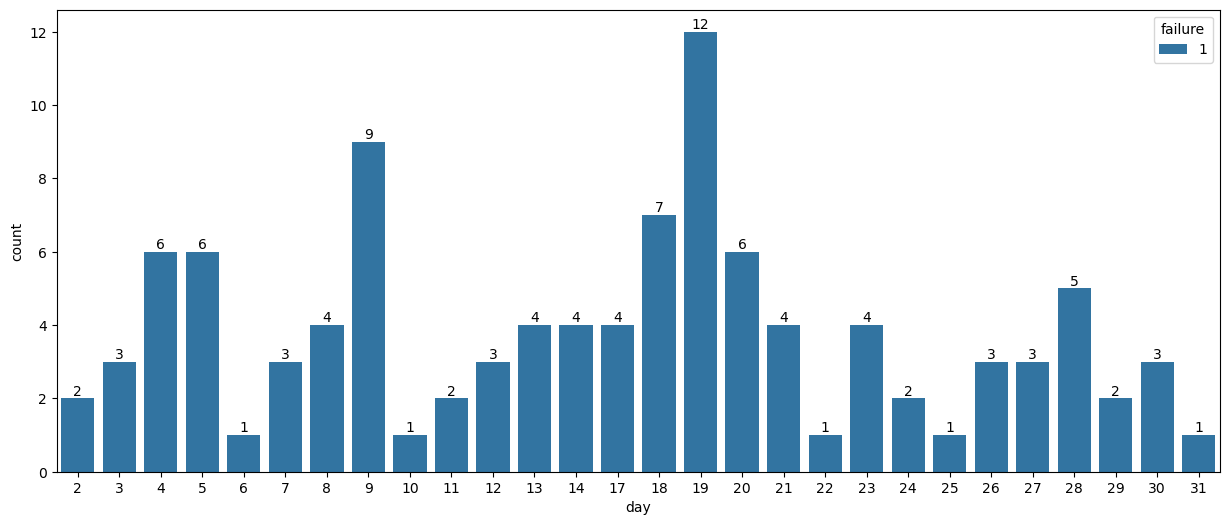

In [129]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'day', hue = 'failure', data=dff);
ax.bar_label(ax.containers[0])

plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   failure        124494 non-null  int64 
 1   attribute1     124494 non-null  int64 
 2   attribute2     124494 non-null  int64 
 3   attribute3     124494 non-null  int64 
 4   attribute4     124494 non-null  int64 
 5   attribute5     124494 non-null  int64 
 6   attribute6     124494 non-null  int64 
 7   attribute7     124494 non-null  int64 
 8   attribute8     124494 non-null  int64 
 9   attribute9     124494 non-null  int64 
 10  device_model   124494 non-null  object
 11  device_serie   124494 non-null  object
 12  month          124494 non-null  int64 
 13  day            124494 non-null  int64 
 14  day_type       124494 non-null  object
 15  day_of_week    124494 non-null  int32 
 16  period_annual  124494 non-null  object
dtypes: int32(1), int64(12), object(4)
memory usage: 

In [131]:
cat=['device_model', 'device_serie','day_type', 'period_annual']

In [132]:
df[cat]

device_model device_serie day_type period_annual
0               S1F         S1F0       WD         first
1               S1F         S1F0       WD         first
2               S1F         S1F0       WD         first
3               S1F         S1F0       WD         first
4               S1F         S1F0       WD         first
...             ...          ...      ...           ...
124489          Z1F         Z1F0       WD        fourth
124490          Z1F         Z1F0       WD        fourth
124491          Z1F         Z1F0       WD        fourth
124492          Z1F         Z1F0       WD        fourth
124493          Z1F         Z1F0       WD        fourth

[124494 rows x 4 columns]

In [136]:
x=df.drop("failure", axis=1)  
y=df['failure']

In [137]:
x = pd.get_dummies(x, columns=cat, drop_first=True)

In [139]:
x

attribute1  attribute2  attribute3  attribute4  attribute5  \
0        215630672          56           0          52           6   
1         61370680           0           3           0           6   
2        173295968           0           0           0          12   
3         79694024           0           0           0           6   
4        135970480           0           0           0          15   
...            ...         ...         ...         ...         ...   
124489    18310224           0           0           0          10   
124490   172556680          96         107           4          11   
124491    19029120        4832           0           0          11   
124492   226953408           0           0           0          12   
124493    17572840           0           0           0          10   

        attribute6  attribute7  attribute8  attribute9  month  ...  \
0           407438           0           0           7      1  ...   
1           403174           0           0           0      1  ...   
2           237394           0           0           0      1  ...   
3           410186           0           0           0      1  ...   
4           313173           0           0           3      1  ...   
...            ...         ...         ...         ...    ...  ...   
124489      353705           8           8           0     11  ...   
124490      332792           0           0          13     11  ...   
124491      350410           0           0           0     11  ...   
124492      358980           0           0           0     11  ...   
124493      351431           0           0           0     11  ...   

        device_serie_S1F1  device_serie_W1F0  device_serie_W1F1  \
0                   False              False              False   
1                   False              False              False   
2                   False              False              False   
3                   False              False              False   
4                   False              False              False   
...                   ...                ...                ...   
124489              False              False              False   
124490              False              False              False   
124491              False              False              False   
124492              False              False              False   
124493              False              False              False   

        device_serie_Z1F0  device_serie_Z1F1  device_serie_Z1F2  day_type_WE  \
0                   False              False              False        False   
1                   False              False              False        False   
2                   False              False              False        False   
3                   False              False              False        False   
4                   False              False              False        False   
...                   ...                ...                ...          ...   
124489               True              False              False        False   
124490               True              False              False        False   
124491               True              False              False        False   
124492               True              False              False        False   
124493               True              False              False        False   

        period_annual_fourth  period_annual_second  period_annual_third  
0                      False                 False                False  
1                      False                 False                False  
2                      False                 False                False  
3                      False                 False                False  
4                      False                 False                False  
...                      ...                   ...                  ...  
124489                  True              

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')

In [143]:
algo_test (x,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Algorithm:
 GaussianNB
Confusion Matrix:
 [[24845    16]
 [   36     2]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24861
           1       0.11      0.05      0.07        38

    accuracy                           1.00     24899
   macro avg       0.55      0.53      0.54     24899
weighted avg       1.00      1.00      1.00     24899

Accuracy Score:
 0.997911562713362
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[24755    16]
 [  126     2]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     24771
           1       0.11      0.02      0.03       128

    accuracy                           0.99     24899
   macro avg       0.55      0.51      0.51     24899
weighted avg       0.99      0.99      0.99     24899

Accuracy Score:
 0.9942969597172577
*****************

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

